In [3]:
# Libraries
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, r2_score
from collections import defaultdict

In [4]:
import yfinance as yf
from datetime import date

end_date = date.today().strftime("%Y-%m-%d")
start_date = '2010-06-29'

df = yf.download('TSLA', start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
print(df.head())
print(df.info())

Price          Close      High       Low      Open     Volume
Ticker          TSLA      TSLA      TSLA      TSLA       TSLA
Date                                                         
2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3706 entries, 2010-06-29 to 2025-03-21
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   3706 non-null   float64
 1   (High, TSLA)    3706 non-null   float64
 2   (Low, TSLA)     3706 non-null   float64
 3   (Open, TSLA)    3706 non-null   float64
 4   (Volume, TSLA)  3706 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 173.7 KB
None


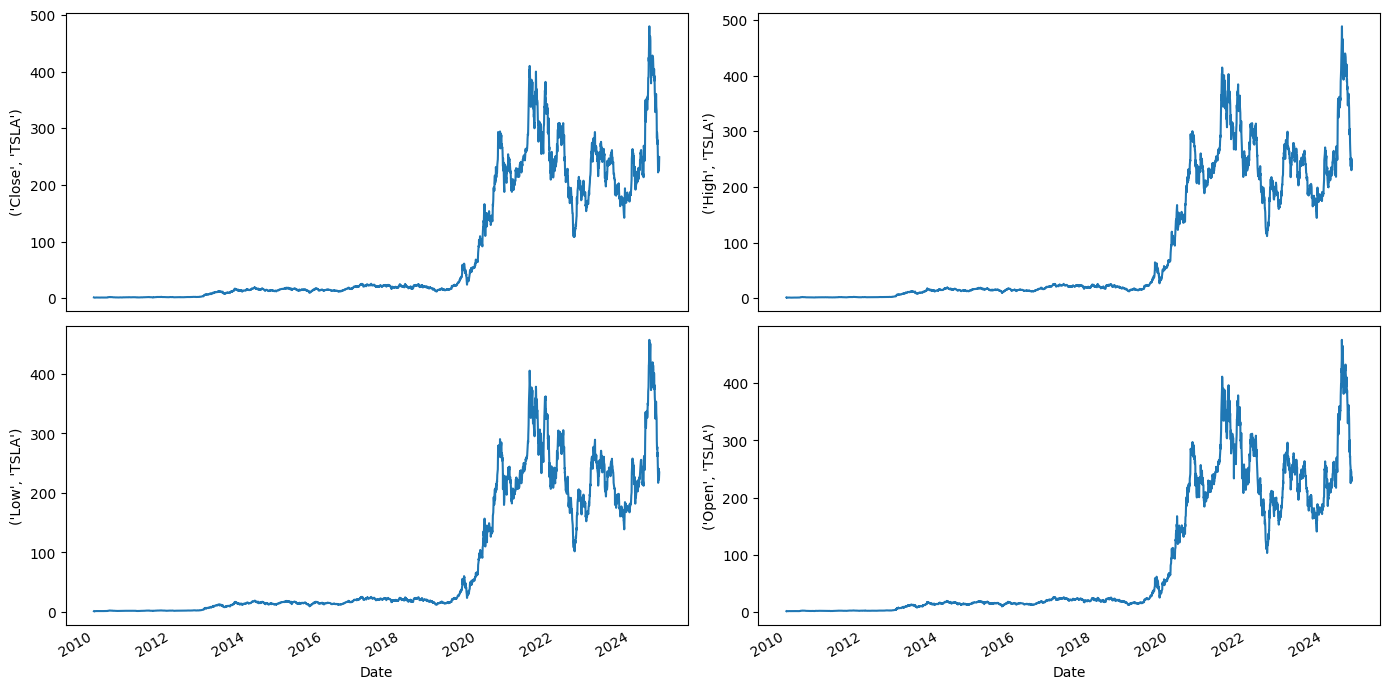

In [6]:
import matplotlib.dates as mdates

def data_plot(df):
    # Plot line charts
    df_plot = df.copy()

    ncols = 2
    nrows = int(round(df_plot.shape[1] / ncols, 0))

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
    for i, ax in enumerate(fig.axes):
        sns.lineplot(data=df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    fig.tight_layout()
    plt.show()

# Plot the data
data_plot(df)

In [ ]:
import math
from sklearn.preprocessing import MinMaxScaler

# Train test split
training_data_len = math.ceil(len(df) * .8)
print(training_data_len)

# Splitting the dataset
features = ['Open', 'High', 'Low', 'Close', 'Volume']
train_data = df[features][:training_data_len]
test_data = df[features][training_data_len:]
print(train_data.shape, test_data.shape)

# Training
# Selecting Open Price values
dataset_train = train_data.Open.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1, 1))
print(dataset_train.shape)

# Testing
# Selecting Open Price values
dataset_test = test_data.Open.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1, 1))
print(dataset_test.shape)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(dataset_train)
print(scaled_train[:5])

# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(scaled_test[:5])

2965
(2965, 5) (741, 5)
(2965, 1)
(741, 1)
[[0.0004646 ]
 [0.0015676 ]
 [0.00143927]
 [0.00111438]
 [0.00062704]]
[[0.66451238]
 [0.65630643]
 [0.60016088]
 [0.61557164]
 [0.60076877]]


In [8]:
sequence_length = 50  # Number of time steps to look back
sequence_length2= 30  # Number of time steps to look back
# Train test split
training_data_len = math.ceil(len(df) * .8)
print(training_data_len)

# Splitting the dataset
features = ['Open', 'High', 'Low', 'Close', 'Volume']
train_data = df[features][:training_data_len]
test_data = df[features][training_data_len:]
print(train_data.shape, test_data.shape)

2965
(2965, 5) (741, 5)


In [9]:
# Selecting Open Price values
dataset_train = train_data.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1, 5))
print(dataset_train.shape)

# Selecting Open Price values
dataset_test = test_data.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1, 5))
print(dataset_test.shape)

scaler = MinMaxScaler(feature_range=(0, 1))
# Scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
print(scaled_train[:5])

# Normalizing values between 0 and 1
scaled_test = scaler.transform(dataset_test)
print(scaled_test[:5])

(2965, 5)
(741, 5)
[[4.64595078e-04 1.34982138e-03 4.21743216e-04 1.31893362e-03
  3.06604867e-01]
 [1.56759864e-03 2.22389882e-03 1.37066943e-03 1.30915180e-03
  2.80639852e-01]
 [1.43926814e-03 1.49818819e-03 8.71494730e-04 1.00428027e-03
  1.33184151e-01]
 [1.11437537e-03 1.04340943e-03 6.14493991e-04 5.54310805e-04
  8.25596059e-02]
 [6.27038990e-04 5.43474885e-04 1.40030885e-04 5.05407544e-05
  1.10956375e-01]]
[[0.85215832 0.86542103 0.83899562 0.85926231 0.08513572]
 [0.84470207 0.84272243 0.83973693 0.83336455 0.05835354]
 [0.79368604 0.81049282 0.80036313 0.79296514 0.06311445]
 [0.80768886 0.8207495  0.80197759 0.80194824 0.0703696 ]
 [0.79423839 0.82482151 0.79909459 0.83082129 0.05847127]]


In [10]:
# Create sequences and labels for training data

X_train, y_train = [], []
for i in range(len(scaled_train) - sequence_length):
    X_train.append(scaled_train[i:i + sequence_length])
    y_train.append(scaled_train[i + sequence_length][0])  # Predicting next "Open"


# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Shape: (N, 1)
print(X_train.shape, y_train.shape)


torch.Size([2915, 50, 5]) torch.Size([2915, 1])


C:\Users\rolfs\AppData\Local\Temp\ipykernel_18952\1649079307.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  X_train = torch.tensor(X_train, dtype=torch.float32)


In [11]:
# Create sequences and labels for testing data

X_test, y_test = [], []
for i in range(len(scaled_test) - sequence_length2):
    X_test.append(scaled_test[i:i + sequence_length2])
    y_test.append(scaled_test[i + sequence_length2][0])  # Predicting next "Open"


# Convert data to PyTorch tensors
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)  # Shape: (N, 1)
print(X_test.shape, y_test.shape)


torch.Size([711, 30, 5]) torch.Size([711, 1])


In [12]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout=0.2):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.linear(out[:, -1, :])
        return out

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

input_size = 5
num_layers = 3  # Increased number of layers
hidden_size = 128  # Increased number of hidden units
output_size = 5
dropout = 0.2  # Added dropout for regularization

model = GRUModel(input_size, hidden_size, num_layers, dropout).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=1e-3)  # Learning rate

batch_size = 32  # Adjusted batch size
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_epochs = 1000  # Increased number of epochs
train_hist = []
test_hist = []

for epoch in range(num_epochs):
    total_loss = 0.0
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        predictions = model(batch_X)
        loss = loss_fn(predictions, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    train_hist.append(average_loss)

    model.eval()
    with torch.no_grad():
        total_test_loss = 0.0

        for batch_X_test, batch_y_test in test_loader:
            batch_X_test, batch_y_test = batch_X_test.to(device), batch_y_test.to(device)
            predictions_test = model(batch_X_test)
            test_loss = loss_fn(predictions_test, batch_y_test)

            total_test_loss += test_loss.item()

        average_test_loss = total_test_loss / len(test_loader)
        test_hist.append(average_test_loss)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}')




cpu
Epoch [10/1000] - Training Loss: 0.0004, Test Loss: 0.0008


KeyboardInterrupt: 

In [14]:
# Evaluate the model and calculate RMSE and R² score
model.eval()
with torch.no_grad():
    test_predictions = []
    for batch_X_test in X_test:
        batch_X_test = batch_X_test.to(device).unsqueeze(0)  # Add batch dimension
        test_predictions.append(model(batch_X_test).cpu().numpy().flatten()[0])

test_predictions = np.array(test_predictions)

# Calculate RMSE and R² score
rmse = np.sqrt(mean_squared_error(y_test.cpu().numpy(), test_predictions))
r2 = r2_score(y_test.cpu().numpy(), test_predictions)

print(f'RMSE: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

rmse_val = f"{rmse:.5f}"
r2_val = f"{r2:.5f}"
model_name = f"./output.pth"
torch.save(model.state_dict(), model_name)
print(f"✅ Saved model as: {model_name}")


RMSE: 0.0287
R² Score: 0.9672
✅ Saved model as: ./output.pth
